In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('finalChildMalnutrition.csv', index_col = 0 )

In [3]:
df = df.fillna(df[['fever','Mother_BMI']].mean())
df = df.fillna(df[['diar','Father_Edu','currently_working_mot']].mean())

In [4]:
#df['Division'] = df['Division'].map({1:'barisal',2:'chittagong',3:'dhaka',4:'khulna',5:'Rajshahi',6:'Rangpur',7:'sylhet'})

In [5]:
#df['Mother_edu'] = df['Mother_edu'].map({0:'no', 1:'yes'})

In [6]:
#df['Breastfeeding'] = df['Breastfeeding'].map({0:'no', 1:'yes'})

In [7]:
#df['currently_working_mot'] = df['currently_working_mot'].map({0:'no', 1:'yes'})

In [8]:
#df['wealth_index_cat'] = df['wealth_index_cat'].map({0:'no', 1:'yes'})

In [9]:
df.head()

,Division,Age at 1st Birth,Child Age,stunting,underweight,wasting,diar,fever,ari,Mother_BMI,Birth_Order,Mother_edu,wealth_index_cat,Father_Edu,residence,sex,currently_working_mot,Breastfeeding,household_no
0,1,16,13,0,1,1,0.0,1.0,1,20.96,2,0,0,0.0,1,1,0.0,1,6
1,1,18,47,0,1,1,0.0,1.0,0,19.71,2,0,0,0.0,1,1,0.0,0,5
2,1,16,23,0,0,0,0.0,0.0,0,20.66,3,0,0,0.0,1,1,1.0,1,5
3,1,21,11,0,0,0,0.0,0.0,0,18.41,1,0,0,0.0,1,1,0.0,1,2
4,1,15,51,1,1,0,0.0,1.0,0,19.47,3,0,1,0.0,1,1,1.0,0,4


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 0 to 6964
Data columns (total 19 columns):
Division                 6965 non-null int64
Age at 1st Birth         6965 non-null int64
Child Age                6965 non-null int64
stunting                 6965 non-null int64
underweight              6965 non-null int64
wasting                  6965 non-null int64
diar                     6965 non-null float64
fever                    6965 non-null float64
ari                      6965 non-null int64
Mother_BMI               6965 non-null float64
Birth_Order              6965 non-null int64
Mother_edu               6965 non-null int64
wealth_index_cat         6965 non-null int64
Father_Edu               6965 non-null float64
residence                6965 non-null int64
sex                      6965 non-null int64
currently_working_mot    6965 non-null float64
Breastfeeding            6965 non-null int64
household_no             6965 non-null int64
dtypes: float64(5), int64(14

In [11]:
# 1. accuracy
# ---------

In [12]:
# -----------
# stunting  |
# -----------

In [11]:
allAccuStun = pd.DataFrame({
    'algo'   : ['DecisionTreeClassifier','svm','naive Bayes','random forest','logistic regression', 'ANN'],
    'accuracy(stunting) %' : [57.376, 65.543, 64.018, 64.627, 65.183, 64.275]
})

In [12]:
allAccuStun

,algo,accuracy(stunting) %
0,DecisionTreeClassifier,57.376
1,svm,65.543
2,naive Bayes,64.018
3,random forest,64.627
4,logistic regression,65.183
5,ANN,64.275


Text(0.5, 1.0, 'all stunting accuracy comparison:\n--------------------------------------------\n')

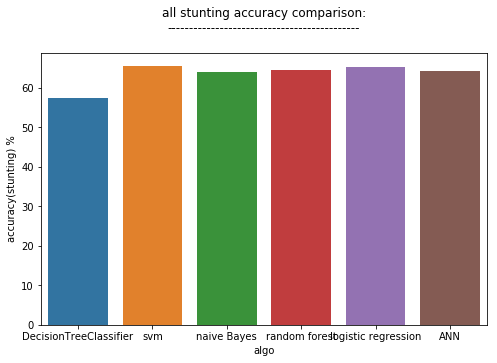

In [13]:
plt.figure(figsize=(8,5))
barplot = sns.barplot(x = 'algo', y = 'accuracy(stunting) %', data = allAccuStun)
plt.title('all stunting accuracy comparison:\n--------------------------------------------\n')

In [19]:
# -------------
# underweight  |
# -------------

In [14]:
allAccuUnder = pd.DataFrame({
    'algo'   : ['DecisionTreeClassifier','svm','naive Bayes','random forest','logistic regression', 'ANN'],
    'accuracy(underweight) %' : [59.690, 68.198, 64.681, 65.649, 68.341, 69.1535]
})

In [15]:
allAccuUnder

,algo,accuracy(underweight) %
0,DecisionTreeClassifier,59.6900
1,svm,68.1980
2,naive Bayes,64.6810
3,random forest,65.6490
4,logistic regression,68.3410
5,ANN,69.1535


Text(0.5, 1.0, 'all underweight accuracy comparison:\n--------------------------------------------\n')

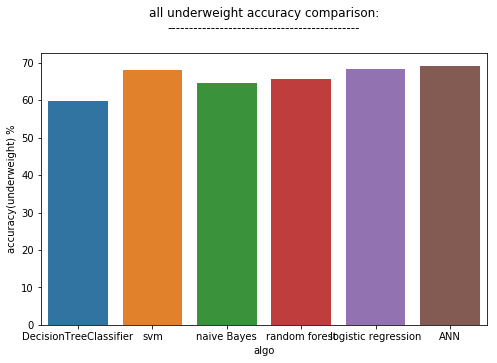

In [16]:
plt.figure(figsize=(8,5))
barplot = sns.barplot(x = 'algo', y = 'accuracy(underweight) %', data = allAccuUnder)
plt.title('all underweight accuracy comparison:\n--------------------------------------------\n')

In [20]:
# ----------
# wasting  |
# ----------

In [17]:
allAccuWast = pd.DataFrame({
    'algo'   : ['DecisionTreeClassifier','svm','naive Bayes','random forest','logistic regression', 'ANN'],
    'accuracy(wasting) %' : [74.676, 85.930, 82.970, 85.463, 85.930, 85.9397]
})

In [18]:
allAccuWast

,algo,accuracy(wasting) %
0,DecisionTreeClassifier,74.6760
1,svm,85.9300
2,naive Bayes,82.9700
3,random forest,85.4630
4,logistic regression,85.9300
5,ANN,85.9397


Text(0.5, 1.0, 'all wasting accuracy comparison:\n--------------------------------------------\n')

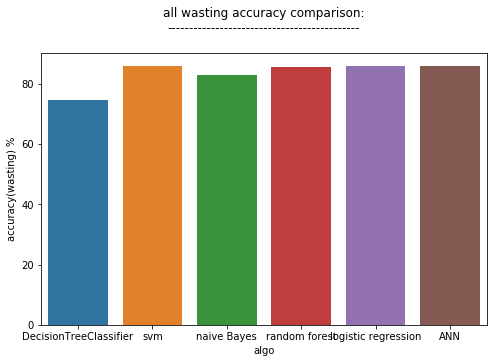

In [19]:
plt.figure(figsize=(8,5))
barplot = sns.barplot(x = 'algo', y = 'accuracy(wasting) %', data = allAccuWast)
plt.title('all wasting accuracy comparison:\n--------------------------------------------\n')

In [20]:
sc = StandardScaler()
sc1 = StandardScaler()

In [21]:
# -----------------------------------------------------------------------------------------
# 2. Probability of having stunning, wasting and underweight respect to mother’s education
# -----------------------------------------------------------------------------------------

In [22]:
logReg = LogisticRegression(random_state = 0)

In [23]:
x_Mother_edu = df.iloc[:, [11]].values

y_stun = df.iloc[:, 3].values
y_underW = df.iloc[:, 4].values
y_was = df.iloc[:, 5].values

In [24]:
x_train_Mother_edu_stun,x_test_Mother_edu_stun,y_train_Mother_edu_stun,y_test_Mother_edu_stun = train_test_split(x_Mother_edu, y_stun, test_size=0.1, random_state=101)
x_train_Mother_edu_underW,x_test_Mother_edu_underW,y_train_Mother_edu_underW,y_test_Mother_edu_underW = train_test_split(x_Mother_edu, y_underW, test_size=0.1, random_state=101)
x_train_Mother_edu_was,x_test_Mother_edu_was,y_train_Mother_edu_was,y_test_Mother_edu_was = train_test_split(x_Mother_edu, y_was, test_size=0.1, random_state=101)

In [25]:
logReg.fit(x_train_Mother_edu_stun, y_train_Mother_edu_stun)
logReg.fit(x_train_Mother_edu_underW, y_train_Mother_edu_underW)
logReg.fit(x_train_Mother_edu_was, y_train_Mother_edu_was)

y_pred_Mother_edu_stun = logReg.predict(x_test_Mother_edu_stun)
y_pred_Mother_edu_underwei = logReg.predict(x_test_Mother_edu_underW)
y_pred_Mother_edu_wast = logReg.predict(x_test_Mother_edu_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
print('accuracy score of stunting: ', round(accuracy_score(y_test_Mother_edu_stun, y_pred_Mother_edu_stun)*100, 5), '\n')
print('accuracy score of underweight: ', round(accuracy_score(y_test_Mother_edu_underW, y_pred_Mother_edu_underwei)*100, 5), '\n')
print('accuracy score of wasting: ', round(accuracy_score(y_test_Mother_edu_was, y_pred_Mother_edu_wast)*100, 5), '\n')

accuracy score of stunting:  63.41463 

accuracy score of underweight:  68.86657 

accuracy score of wasting:  87.94835 



In [28]:
allAccuMothEdu = pd.DataFrame({
    'decision'   : ['stunting','underweight','wasting'],
    'accuracy (%)' : [63.41463, 68.86657, 87.94835]
})

Text(0.5, 1.0, 'stunting, underweight, wasting with respect to mother education:\n---------------------------------------------------------\n')

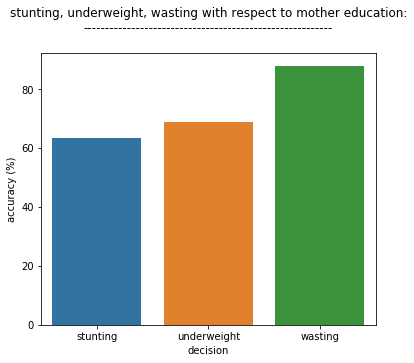

In [30]:
plt.figure(figsize=(6,5))
barplot1 = sns.barplot(x = 'decision', y = 'accuracy (%)', data = allAccuMothEdu)
plt.title('stunting, underweight, wasting with respect to mother education:\n---------------------------------------------------------\n')

In [31]:
# -----------------------------------------------------------------------------------------
# 3. Probability of having stunning, wasting and underweight respect to have previous child. 
# -----------------------------------------------------------------------------------------

In [32]:
logReg1 = LogisticRegression(random_state = 0)

In [33]:
x_birth_order = df.iloc[:, [10]].values

y_birth_order_stun = df.iloc[:, 3].values
y_birth_order_underW = df.iloc[:, 4].values
y_birth_order_was = df.iloc[:, 5].values

In [38]:
x_train_birth_order_stun,x_test_birth_order_stun,y_train_birth_order_stun,y_test_birth_order_stun = train_test_split(x_birth_order, y_birth_order_stun, test_size=0.1, random_state=41)
x_train_birth_order_underW,x_test_birth_order_underW,y_train_birth_order_underW,y_test_birth_order_underW = train_test_split(x_birth_order, y_birth_order_underW, test_size=0.1, random_state=41)
x_train_birth_order_was,x_test_birth_order_was,y_train_birth_order_was,y_test_birth_order_was = train_test_split(x_birth_order, y_birth_order_was, test_size=0.1, random_state=41)

In [39]:
logReg1.fit(x_train_birth_order_stun, y_train_birth_order_stun)
logReg1.fit(x_train_birth_order_underW, y_train_birth_order_underW)
logReg1.fit(x_train_birth_order_was, y_train_birth_order_was)

y_pred_birth_orde_stun = logReg1.predict(x_test_birth_order_stun)
y_pred_birth_orde_underwei = logReg1.predict(x_test_birth_order_underW)
y_pred_birth_orde_wast = logReg1.predict(x_test_birth_order_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
print('accuracy score of stunting: ', round(accuracy_score(y_test_birth_order_stun, y_pred_birth_orde_stun)*100, 5), '\n')
print('accuracy score of underweight: ', round(accuracy_score(y_test_birth_order_underW, y_pred_birth_orde_underwei)*100, 5), '\n')
print('accuracy score of wasting: ', round(accuracy_score(y_test_birth_order_was, y_pred_birth_orde_wast)*100, 5), '\n')

accuracy score of stunting:  63.55811 

accuracy score of underweight:  68.14921 

accuracy score of wasting:  86.51363 



In [41]:
allAccuBirthOrd = pd.DataFrame({
    'decision'   : ['stunting','underweight','wasting'],
    'accuracy (%)' : [63.55811, 68.14921, 86.51363]
})

No handles with labels found to put in legend.


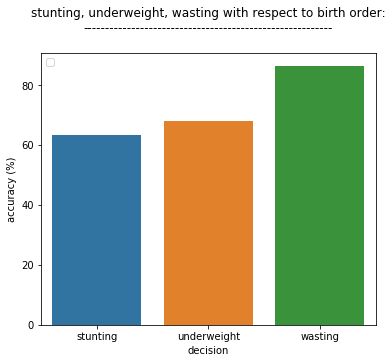

In [43]:
plt.figure(figsize=(6,5))
barplot2 = sns.barplot(x = 'decision', y = 'accuracy (%)', data = allAccuBirthOrd)
plt.title('stunting, underweight, wasting with respect to birth order:\n---------------------------------------------------------\n')

In [37]:
# -----------------------------------------------------------------------------------------
# 4. Probability of having stunning, wasting and underweight respect to have breastfeeding.. 
# -----------------------------------------------------------------------------------------

In [50]:
logReg2 = LogisticRegression(random_state = 0)

In [51]:
x_bfeed = df.iloc[:, [17]].values

y_bfeed_stun = df.iloc[:, 3].values
y_bfeed_underW = df.iloc[:, 4].values
y_bfeed_was = df.iloc[:, 5].values

In [52]:
x_train_bfeed_stun,x_test_bfeed_stun,y_train_bfeed_stun,y_test_bfeed_stun = train_test_split(x_bfeed, y_bfeed_stun, test_size=0.1, random_state=0)

x_train_bfeed_underW,x_test_bfeed_underW,y_train_bfeed_underW,y_test_bfeed_underW = train_test_split(x_bfeed, y_bfeed_underW, test_size=0.1, random_state=0)

x_train_bfeed_was,x_test_bfeed_was,y_train_bfeed_was,y_test_bfeed_was = train_test_split(x_bfeed, y_bfeed_was, test_size=0.1, random_state=0)

In [53]:
logReg2.fit(x_train_bfeed_stun, y_train_bfeed_stun)
logReg2.fit(x_train_bfeed_underW, y_train_bfeed_underW)
logReg2.fit(x_train_bfeed_was, y_train_bfeed_was)

y_pred_bfeed_stun = logReg2.predict(x_test_bfeed_stun)
y_pred_bfeed_underwei = logReg2.predict(x_test_bfeed_underW)
y_pred_bfeed_wast = logReg2.predict(x_test_bfeed_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
print('accuracy score of stunting: ', round(accuracy_score(y_test_bfeed_stun, y_pred_bfeed_stun)*100, 5), '\n')
print('accuracy score of underweight: ', round(accuracy_score(y_test_bfeed_underW, y_pred_bfeed_underwei)*100, 5), '\n')
print('accuracy score of wasting: ', round(accuracy_score(y_test_bfeed_was, y_pred_bfeed_wast)*100, 5), '\n')

accuracy score of stunting:  66.1406 

accuracy score of underweight:  67.43185 

accuracy score of wasting:  84.36155 



In [56]:
allAccuBrestFeed = pd.DataFrame({
    'decision'   : ['stunting','underweight','wasting'],
    'accuracy (%)' : [66.1406, 67.43185, 84.36155]
})

Text(0.5, 1.0, 'stunting, underweight, wasting with respect to brest feeding:\n---------------------------------------------------------\n')

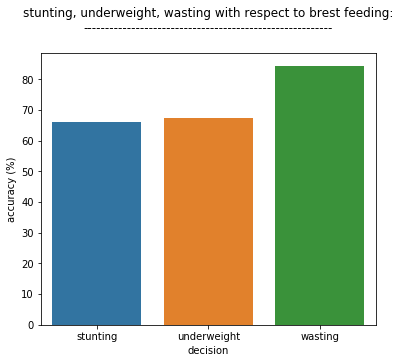

In [57]:
plt.figure(figsize=(6,5))
barplot2 = sns.barplot(x = 'decision', y = 'accuracy (%)', data = allAccuBrestFeed)
plt.title('stunting, underweight, wasting with respect to brest feeding:\n---------------------------------------------------------\n')

In [58]:
# -----------------------------------------------------------------------------------------
# 5. Probability of having stunning, wasting and underweight respect to have mothers BMI 
# -----------------------------------------------------------------------------------------

In [59]:
logReg3 = LogisticRegression(random_state = 0)

In [60]:
x_bmi = df.iloc[:, [9]].values

y_bmi_stun = df.iloc[:, 3].values
y_bmi_underW = df.iloc[:, 4].values
y_bmi_was = df.iloc[:, 5].values

In [61]:
x_train_bmi_stun,x_test_bmi_stun,y_train_bmi_stun,y_test_bmi_stun = train_test_split(x_bmi, y_bmi_stun, test_size=0.2, random_state=43)

x_train_bmi_underW,x_test_bmi_underW,y_train_bmi_underW,y_test_bmi_underW = train_test_split(x_bmi, y_bmi_underW, test_size=0.2, random_state=43)

x_train_bmi_was,x_test_bmi_was,y_train_bmi_was,y_test_bmi_was = train_test_split(x_bmi, y_bmi_was, test_size=0.2, random_state=43)

In [62]:
x_train_bmi_stun = sc.fit_transform(x_train_bmi_stun)
x_train_bmi_underW = sc.fit_transform(x_train_bmi_underW)
x_train_bmi_was = sc.fit_transform(x_train_bmi_was)

x_test_bmi_stun = sc.transform(x_test_bmi_stun)
x_test_bmi_underW = sc.transform(x_test_bmi_underW)
x_test_bmi_was = sc.transform(x_test_bmi_was)

In [63]:
logReg3.fit(x_train_bmi_stun, y_train_bmi_stun)
logReg3.fit(x_train_bmi_underW, y_train_bmi_underW)
logReg3.fit(x_train_bmi_was, y_train_bmi_was)

y_pred_bmi_stun = logReg3.predict(x_test_bmi_stun)
y_pred_bmi_underwei = logReg3.predict(x_test_bmi_underW)
y_pred_bmi_wast = logReg3.predict(x_test_bmi_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
print('accuracy score of stunting: ', round(accuracy_score(y_test_bmi_stun, y_pred_bmi_stun)*100, 5), '\n')
print('accuracy score of underweight: ', round(accuracy_score(y_test_bmi_underW, y_pred_bmi_underwei)*100, 5), '\n')
print('accuracy score of wasting: ', round(accuracy_score(y_test_bmi_was, y_pred_bmi_wast)*100, 5), '\n')

accuracy score of stunting:  63.89088 

accuracy score of underweight:  67.48026 

accuracy score of wasting:  85.85786 



In [66]:
allAccuBmi = pd.DataFrame({
    'decision'   : ['stunting','underweight','wasting'],
    'accuracy (%)' : [63.89088, 67.48026, 85.85786]
})

Text(0.5, 1.0, 'stunting, underweight, wasting with respect to bmi:\n---------------------------------------------------------\n')

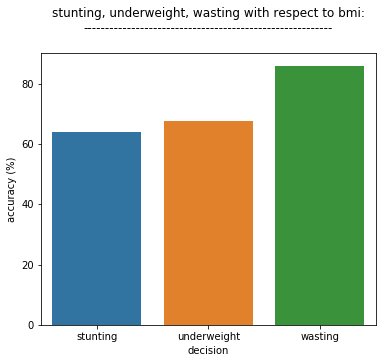

In [67]:
plt.figure(figsize=(6,5))
barplot3 = sns.barplot(x = 'decision', y = 'accuracy (%)', data = allAccuBmi)
plt.title('stunting, underweight, wasting with respect to bmi:\n---------------------------------------------------------\n')

In [50]:
# ---------------------------------------------------------------------------------------------------------------
# 6. Probability of having stunning, wasting and underweight respect to have mother’s currently working situation
# ---------------------------------------------------------------------------------------------------------------

In [68]:
logReg4 = LogisticRegression(random_state = 101)

In [69]:
x_working = df.iloc[:, [16]].values

y_working_stun = df.iloc[:, 3].values
y_working_underW = df.iloc[:, 4].values
y_working_was = df.iloc[:, 5].values

In [70]:
x_train_working_stun,x_test_working_stun,y_train_working_stun,y_test_working_stun = train_test_split(x_working, y_working_stun, test_size=0.2, random_state=0)

x_train_working_underW,x_test_working_underW,y_train_working_underW,y_test_working_underW = train_test_split(x_working, y_working_underW, test_size=0.2, random_state=0)

x_train_working_was,x_test_working_was,y_train_working_was,y_test_working_was = train_test_split(x_working, y_working_was, test_size=0.2, random_state=0)

In [71]:
logReg4.fit(x_train_working_stun, y_train_working_stun)
logReg4.fit(x_train_working_underW, y_train_working_underW)
logReg4.fit(x_train_working_was, y_train_working_was)

y_pred_working_stun = logReg4.predict(x_test_working_stun)
y_pred_working_underwei = logReg4.predict(x_test_working_underW)
y_pred_working_wast = logReg4.predict(x_test_working_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
print('accuracy score of stunting: ', round(accuracy_score(y_test_working_stun, y_pred_working_stun)*100, 5), '\n')
print('accuracy score of underweight: ', round(accuracy_score(y_test_working_underW, y_pred_working_underwei)*100, 5), '\n')
print('accuracy score of wasting: ', round(accuracy_score(y_test_working_was, y_pred_working_wast)*100, 5), '\n')

accuracy score of stunting:  65.47021 

accuracy score of underweight:  67.55205 

accuracy score of wasting:  85.42714 



In [74]:
allAccuMothWork = pd.DataFrame({
    'decision'   : ['stunting','underweight','wasting'],
    'accuracy (%)' : [65.47021, 67.55205, 85.42714]
})

Text(0.5, 1.0, 'stunting, underweight, wasting with respect to mother working:\n---------------------------------------------------------\n')

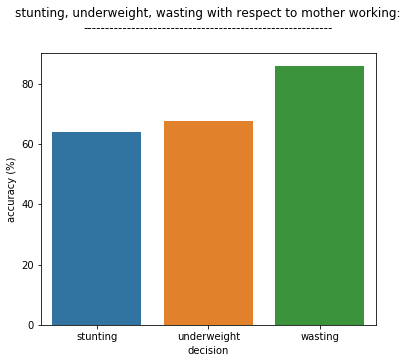

In [75]:
plt.figure(figsize=(6,5))
barplot4 = sns.barplot(x = 'decision', y = 'accuracy (%)', data = allAccuBmi)
plt.title('stunting, underweight, wasting with respect to mother working:\n---------------------------------------------------------\n')

In [76]:
# ---------------------------------------------------------------------------------------------------------------
# 7. Probability of having stunning, wasting and underweight respect to wealth index_cat
# ---------------------------------------------------------------------------------------------------------------

In [77]:
logReg5 = LogisticRegression(random_state = 0)

In [78]:
x_wealth = df.iloc[:, [12]].values

y_wealth_stun = df.iloc[:, 3].values
y_wealth_underW = df.iloc[:, 4].values
y_wealth_was = df.iloc[:, 5].values

In [79]:
x_train_wealth_stun,x_test_wealth_stun,y_train_wealth_stun,y_test_wealth_stun = train_test_split(x_wealth, y_wealth_stun, test_size=0.2, random_state=101)

x_train_wealth_underW,x_test_wealth_underW,y_train_wealth_underW,y_test_wealth_underW = train_test_split(x_wealth, y_wealth_underW, test_size=0.2, random_state=101)

x_train_wealth_was,x_test_wealth_was,y_train_wealth_was,y_test_wealth_was = train_test_split(x_wealth, y_wealth_was, test_size=0.2, random_state=101)

In [80]:
logReg5.fit(x_train_wealth_stun, y_train_wealth_stun)
logReg5.fit(x_train_wealth_underW, y_train_wealth_underW)
logReg5.fit(x_train_wealth_was, y_train_wealth_was)

y_pred_wealth_stun = logReg5.predict(x_test_wealth_stun)
y_pred_wealth_underwei = logReg5.predict(x_test_wealth_underW)
y_pred_wealth_wast = logReg5.predict(x_test_wealth_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
print('accuracy score of stunting: ', round(accuracy_score(y_test_wealth_stun, y_pred_wealth_stun)*100, 5), '\n')
print('accuracy score of underweight: ', round(accuracy_score(y_test_wealth_underW, y_pred_wealth_underwei)*100, 5), '\n')
print('accuracy score of wasting: ', round(accuracy_score(y_test_wealth_was, y_pred_wealth_wast)*100, 5), '\n')

accuracy score of stunting:  64.24982 

accuracy score of underweight:  68.62886 

accuracy score of wasting:  86.86289 



In [83]:
allAccuWealthInd = pd.DataFrame({
    'decision'   : ['stunting','underweight','wasting'],
    'accuracy (%)' : [64.24982, 68.62886, 86.86289]
})

Text(0.5, 1.0, 'stunting, underweight, wasting with respect to wealth Ind:\n---------------------------------------------------------\n')

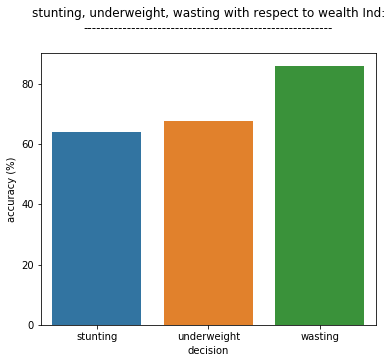

In [84]:
plt.figure(figsize=(6,5))
barplot5 = sns.barplot(x = 'decision', y = 'accuracy (%)', data = allAccuBmi)
plt.title('stunting, underweight, wasting with respect to wealth Ind:\n---------------------------------------------------------\n')

In [85]:
# ---------------------------------------------------------------------------------------------------------------
# 7. Probability of having stunning, wasting and underweight respect to child age
# ---------------------------------------------------------------------------------------------------------------

In [86]:
logReg6 = LogisticRegression(random_state = 0)

In [87]:
x_age = df.iloc[:, [2]].values

y_age_stun = df.iloc[:, 3].values
y_age_underW = df.iloc[:, 4].values
y_age_was = df.iloc[:, 5].values

In [88]:
x_train_age_stun,x_test_age_stun,y_train_age_stun,y_test_age_stun = train_test_split(x_age, y_age_stun, test_size=0.2, random_state=41)

x_train_age_underW,x_test_age_underW,y_train_age_underW,y_test_age_underW = train_test_split(x_age, y_age_underW, test_size=0.2, random_state=41)

x_train_age_was,x_test_age_was,y_train_age_was,y_test_age_was = train_test_split(x_age, y_age_was, test_size=0.2, random_state=41)

In [89]:
x_train_age_stun = sc1.fit_transform(x_train_age_stun)
x_train_age_underW = sc1.fit_transform(x_train_age_underW)
x_train_age_was = sc1.fit_transform(x_train_age_was)

x_test_age_stun = sc1.transform(x_test_age_stun)
x_test_age_underW = sc1.transform(x_test_age_underW)
x_test_age_was = sc1.transform(x_test_age_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was

In [90]:
logReg6.fit(x_train_age_stun, y_train_age_stun)
logReg6.fit(x_train_age_underW, y_train_age_underW)
logReg6.fit(x_train_age_was, y_train_age_was)

y_pred_age_stun = logReg5.predict(x_test_age_stun)
y_pred_age_underwei = logReg5.predict(x_test_age_underW)
y_pred_age_wast = logReg5.predict(x_test_age_was)

C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\This Pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
print('accuracy score of stunting: ', round(accuracy_score(y_test_age_stun, y_pred_age_stun)*100, 5), '\n')
print('accuracy score of underweight: ', round(accuracy_score(y_test_age_underW, y_pred_age_underwei)*100, 5), '\n')
print('accuracy score of wasting: ', round(accuracy_score(y_test_age_was, y_pred_age_wast)*100, 5), '\n')

accuracy score of stunting:  62.81407 

accuracy score of underweight:  67.69562 

accuracy score of wasting:  85.92965 



In [93]:
allAccuAge = pd.DataFrame({
    'decision'   : ['stunting','underweight','wasting'],
    'accuracy (%)' : [64.24982, 68.62886, 86.86289]
})

Text(0.5, 1.0, 'stunting, underweight, wasting with respect to age:\n---------------------------------------------------------\n')

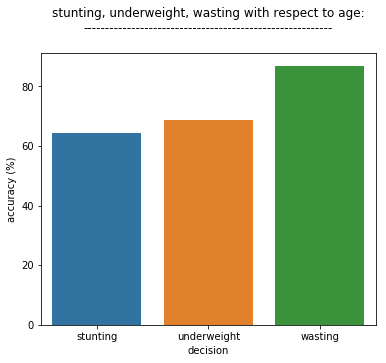

In [94]:
plt.figure(figsize=(6,5))
barplot6 = sns.barplot(x = 'decision', y = 'accuracy (%)', data = allAccuAge)
plt.title('stunting, underweight, wasting with respect to age:\n---------------------------------------------------------\n')